## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics

#note that instance weight is being ignored for this model, as per the instructions

In [2]:
cols=['age','class of worker','industry code','occupation code','education','wage per hour','enrolled in edu instlast wk','maritial status','major industry code','major occupation code','race'
     ,'hispanic origin','sex','member of a labor union','reason for unemployment','full or part time stat','capital gains','capital losses','dividends from stocks',
     'tax filer status','region of prev residence','state of prev residence','detailed household fam stat','detailed household summ in house','instance weight'
     ,'migration code chg in msa','migration code change in reg','migration code chg within reg',
     'in house a year ago','migration prev in sunbelt','num persons wkd for emp','fam members under 18','total person earnings'
     ,'country birth father','country birth mother','country birth self','citizenship','own business',
     'vet benefits','weeks worked per year','year','total taxable income']

In [3]:
#there are no typical null values, but we will consider question marks to be N/A
missingValues=[" ?"]

In [4]:
dfTrain=pd.read_csv('./census_income_learn.csv', names=cols, na_values=missingValues)

In [5]:
dfTest=pd.read_csv('./census_income_test.csv', names=cols, na_values=missingValues)

In [6]:
dfTrain.head(30)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu instlast wk,maritial status,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time stat,capital gains,capital losses,dividends from stocks,tax filer status,region of prev residence,state of prev residence,detailed household fam stat,detailed household summ in house,instance weight,migration code chg in msa,migration code change in reg,migration code chg within reg,in house a year ago,migration prev in sunbelt,num persons wkd for emp,fam members under 18,total person earnings,country birth father,country birth mother,country birth self,citizenship,own business,vet benefits,weeks worked per year,year,total taxable income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,Amer Indian Aleut or Eskimo,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,162.61,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,-50000
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,5178,0,0,Joint both under 65,Not in universe,Not in univers

In [7]:
dfTest.head(10)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu instlast wk,maritial status,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time stat,capital gains,capital losses,dividends from stocks,tax filer status,region of prev residence,state of prev residence,detailed household fam stat,detailed household summ in house,instance weight,migration code chg in msa,migration code change in reg,migration code chg within reg,in house a year ago,migration prev in sunbelt,num persons wkd for emp,fam members under 18,total person earnings,country birth father,country birth mother,country birth self,citizenship,own business,vet benefits,weeks worked per year,year,total taxable income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000
5,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,2556.34,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
6,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in 

Right away, we can see that some attributes aim to measure the same thing. For example, if we
include industry code, we probably don't need to also include major industry code. If we 
include region of residence, we probably don't need state of residence. We can see which
fields have more null values/examine correlation with target in order to decide which, if any, to include

In [8]:
dfTrain.dtypes

age                                   int64
class of worker                      object
industry code                         int64
occupation code                       int64
education                            object
wage per hour                         int64
enrolled in edu instlast wk          object
maritial status                      object
major industry code                  object
major occupation code                object
race                                 object
hispanic origin                      object
sex                                  object
member of a labor union              object
reason for unemployment              object
full or part time stat               object
capital gains                         int64
capital losses                        int64
dividends from stocks                 int64
tax filer status                     object
region of prev residence             object
state of prev residence              object
detailed household fam stat     

In [9]:
dfTrain.shape

(199523, 42)

In [10]:
dfTrain.describe()

,age,industry code,occupation code,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons wkd for emp,citizenship,vet benefits,weeks worked per year,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


In [11]:
dfTrain.duplicated().sum()

3229

In [12]:
dfTrain.drop_duplicates(keep='first')
dfTest.drop_duplicates(keep='first')

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu instlast wk,maritial status,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time stat,capital gains,capital losses,dividends from stocks,tax filer status,region of prev residence,state of prev residence,detailed household fam stat,detailed household summ in house,instance weight,migration code chg in msa,migration code change in reg,migration code chg within reg,in house a year ago,migration prev in sunbelt,num persons wkd for emp,fam members under 18,total person earnings,country birth father,country birth mother,country birth self,citizenship,own business,vet benefits,weeks worked per year,year,total taxable income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000
5,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,2556.34,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
6,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in 

Luckily, there are no nulls in columns we want to include in the model. if there were, we would drop them 
when there are not a high proportion (for example, state of prev residence). If we wanted to include 
migration code chg in msa, though, we would impute the values through KNN or replacing with the mode.

In [13]:
dfTrain.isnull().sum()

age                                     0
class of worker                         0
industry code                           0
occupation code                         0
education                               0
wage per hour                           0
enrolled in edu instlast wk             0
maritial status                         0
major industry code                     0
major occupation code                   0
race                                    0
hispanic origin                         0
sex                                     0
member of a labor union                 0
reason for unemployment                 0
full or part time stat                  0
capital gains                           0
capital losses                          0
dividends from stocks                   0
tax filer status                        0
region of prev residence                0
state of prev residence               708
detailed household fam stat             0
detailed household summ in house  

In [14]:
#it's also important that the test data does not have any nulls for columns we are going to include in the model

dfTest.isnull().sum()

age                                     0
class of worker                         0
industry code                           0
occupation code                         0
education                               0
wage per hour                           0
enrolled in edu instlast wk             0
maritial status                         0
major industry code                     0
major occupation code                   0
race                                    0
hispanic origin                         0
sex                                     0
member of a labor union                 0
reason for unemployment                 0
full or part time stat                  0
capital gains                           0
capital losses                          0
dividends from stocks                   0
tax filer status                        0
region of prev residence                0
state of prev residence               330
detailed household fam stat             0
detailed household summ in house  

In [15]:
dfTrain.nunique()

age                                    91
class of worker                         9
industry code                          52
occupation code                        47
education                              17
wage per hour                        1240
enrolled in edu instlast wk             3
maritial status                         7
major industry code                    24
major occupation code                  15
race                                    5
hispanic origin                        10
sex                                     2
member of a labor union                 3
reason for unemployment                 6
full or part time stat                  8
capital gains                         132
capital losses                        113
dividends from stocks                1478
tax filer status                        6
region of prev residence                6
state of prev residence                50
detailed household fam stat            38
detailed household summ in house  

In [16]:
dfTest.groupby(['total taxable income'])['total taxable income'].count()

total taxable income
 50000+.     6186
-50000      93576
Name: total taxable income, dtype: int64

Since only 6% of the sample is in the above $50,000 class, we will count those instances twice each in an attempt to oversample.

In [17]:
print('The percentage of people who make more than $50,000 in the test data is ','{0:.3%}'.format(6186/(6186+93576)))

The percentage of people who make more than $50,000 in the test data is  6.201%


In [18]:
#converting the target to a binary variable
dfTrain['target']=dfTrain['total taxable income'].map({'-50000':1, ' 50000+.':0})
dfTest['target']=dfTest['total taxable income'].map({'-50000':1, ' 50000+.':0})

Here, we create a new dataframe of only those rows with above $50,000 and append it to the original dataframe.

In [19]:
above50dups = dfTrain[dfTrain['target']==0]
dfTrain=pd.concat([dfTrain,above50dups], axis=0)

above50dups2 = dfTest[dfTest['target']==0]
dfTest=pd.concat([dfTest,above50dups2], axis=0)

In [20]:
#sanity check

dfTrain.head(5)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu instlast wk,maritial status,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time stat,capital gains,capital losses,dividends from stocks,tax filer status,region of prev residence,state of prev residence,detailed household fam stat,detailed household summ in house,instance weight,migration code chg in msa,migration code change in reg,migration code chg within reg,in house a year ago,migration prev in sunbelt,num persons wkd for emp,fam members under 18,total person earnings,country birth father,country birth mother,country birth self,citizenship,own business,vet benefits,weeks worked per year,year,total taxable income,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000,1
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000,1
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000,1
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000,1
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000,1


In [21]:
#gender is binary, so we can use a dummy. i noticed that these fields have a " " before the value, which
#is important or mapping correctly
dfTrain['sex']=dfTrain['sex'].map({' Male':0, ' Female':1})
dfTest['sex']=dfTest['sex'].map({' Male':0, ' Female':1})

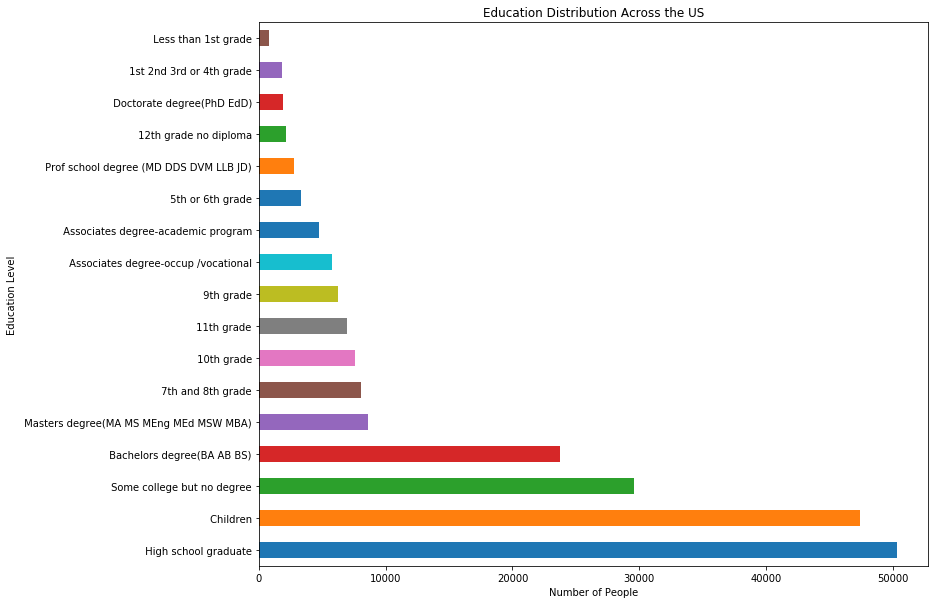

In [22]:
dfTrain['education'].value_counts().plot(kind='barh',figsize=(12,10));

plt.xlabel('Number of People');
plt.ylabel('Education Level');
plt.title('Education Distribution Across the US');

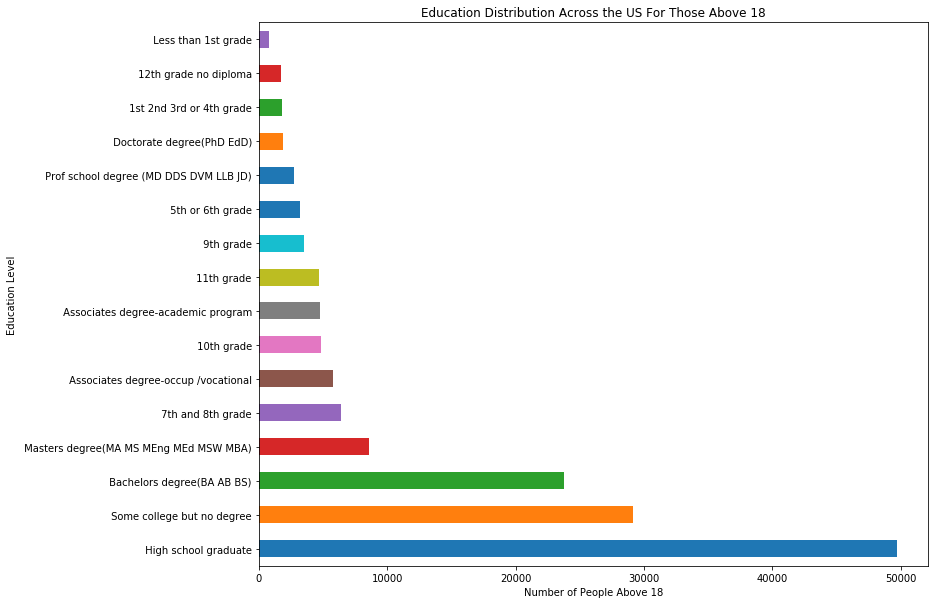

In [23]:
#dfTrain['education'].value_counts().plot(kind='barh');
dfTrain[dfTrain.age>18].education.value_counts().plot(kind='barh',figsize=(12,10));
plt.xlabel('Number of People Above 18');
plt.ylabel('Education Level');
plt.title('Education Distribution Across the US For Those Above 18');

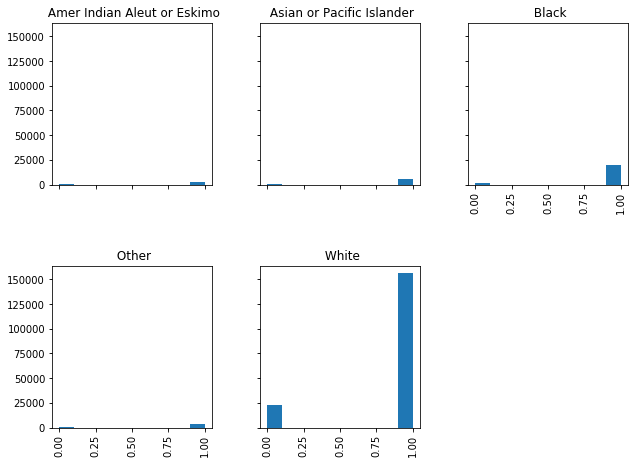

In [24]:
dfTrain.hist(column='target', by='race', sharex=True, sharey=True, layout=(3,3),figsize=(10,12));
plt.title('Income Group by Race');

In [25]:
#higher levels of education go with higher values since it is ordinal. I also noticed that the entries have spaces
#preceding values, which was taken into account here

dfTrain.education.unique().tolist()
dfTrain['education']=dfTrain['education'].map({' Less than 1st grade':0, ' 1st 2nd 3rd or 4th grade':1,
                                             ' 5th or 6th grade':2,' 7th and 8th grade':3,' Children':4,' 9th grade':5,
                                              ' 10th grade':6,' 11th grade':7,' 12th grade no diploma':8,' High school graduate':9,
                                              ' Associates degree-academic program':10,' Some college but no degree':11,
                                              ' Bachelors degree(BA AB BS)':12,' Masters degree(MA MS MEng MEd MSW MBA)':13,
                                              ' Associates degree-occup /vocational':14,' Prof school degree (MD DDS DVM LLB JD)':15,
                                              ' Doctorate degree(PhD EdD)':16})

dfTest['education']=dfTest['education'].map({' Less than 1st grade':0, ' 1st 2nd 3rd or 4th grade':1,
                                             ' 5th or 6th grade':2,' 7th and 8th grade':3,' Children':4,' 9th grade':5,
                                              ' 10th grade':6,' 11th grade':7,' 12th grade no diploma':8,' High school graduate':9,
                                              ' Associates degree-academic program':10,' Some college but no degree':11,
                                              ' Bachelors degree(BA AB BS)':12,' Masters degree(MA MS MEng MEd MSW MBA)':13,
                                              ' Associates degree-occup /vocational':14,' Prof school degree (MD DDS DVM LLB JD)':15,
                                              ' Doctorate degree(PhD EdD)':16})

In [26]:
#since this isn't ranked from low to high values, i will create dummies and exclude 
#the first one in order to create the comparison value which in this case was American Indian or Eskimo
dfTrain['race'].unique().tolist()

raceDummies = pd.get_dummies(dfTrain.race, prefix='race').iloc[:, 1:]
dfTrain=pd.concat([dfTrain,raceDummies], axis=1)

raceDummies2 = pd.get_dummies(dfTest.race, prefix='race').iloc[:, 1:]
dfTest=pd.concat([dfTest,raceDummies2], axis=1)

In [27]:
#sanity check

dfTest.head(10)

,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu instlast wk,maritial status,major industry code,major occupation code,race,hispanic origin,sex,member of a labor union,reason for unemployment,full or part time stat,capital gains,capital losses,dividends from stocks,tax filer status,region of prev residence,state of prev residence,detailed household fam stat,detailed household summ in house,instance weight,migration code chg in msa,migration code change in reg,migration code chg within reg,in house a year ago,migration prev in sunbelt,num persons wkd for emp,fam members under 18,total person earnings,country birth father,country birth mother,country birth self,citizenship,own business,vet benefits,weeks worked per year,year,total taxable income,target,race_ Asian or Pacific Islander,race_ Black,race_ Other,race_ White
0,38,Private,6,36,1,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),1,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,-50000,1,0,0,0,1
1,44,Self-employed-not incorporated,37,12,14,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,1,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,-50000,1,0,0,0,1
2,2,Not in universe,0,0,4,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,0,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,-50000,1,0,0,0,1
3,35,Private,29,3,9,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,1,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,-50000,1,0,0,0,1
4,49,Private,4,34,9,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,0,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,-50000,1,0,0,0,1
5,13,Not in universe,0,0,4,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,0,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,2556.34,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,Germany,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000,1,0,0,0,1
6,1,Not in universe,0,0,4,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,1,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,

We want to include variables that are correlated with the target, as this infers a relationship
between them. However, we want to ensure they and not correlated with each other which would increase
multicollinearity.

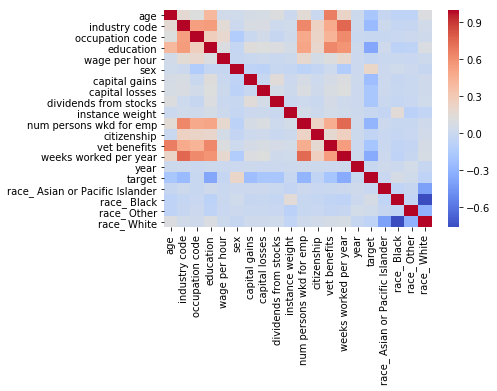

In [28]:
sns.heatmap(dfTrain.corr(),cmap='coolwarm');

In [29]:
#the null accuract is 88%, meaning that if we guess the most popular class (making less than $50,000) every time,
#we would predict the correct outcome 88% of the time. Therefore, we want our model to perform better than this.
print("The null accuracy is ", '{0:.3%}'.format(1-(12372/(12372+93576))))

The null accuracy is  88.323%


In [30]:
#the feature_cols list defines the features I will include in my model, and the target is the binary variaable 
#encoding whether or not someone makes more than $50,000.

feature_cols=['education','sex','industry code','capital gains',
              'race_ Asian or Pacific Islander','race_ Black',
             'race_ Other','race_ White']
X_train=dfTrain[feature_cols]
y_train=dfTrain.target
X_test=dfTest[feature_cols]
y_test=dfTest.target

## Logistic Regression

I decided to test logistic regression because it is less prone to over-fitting than Naive Bayes. Since we have a large dataset and are only using a few features, this algorithm should work well. However, it is important to note that the assumption that the independent and dependent variables are linearly separable is a large one to make. Regardless, it outperformed Naive Bayes and does not require scaling since it is not distance based.

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.4, fit_intercept=True, max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

In [50]:
# calculate accuracy of class predictions
print("The accuracy score is: ",'{0:.3%}'.format(metrics.accuracy_score(y_test, y_pred_log)))

The accuracy score is:  90.034%


In [33]:
# calculate precision of class predictions
print("The precision score is: ",'{0:.3%}'.format(metrics.precision_score(y_test, y_pred_log)))

The precision score is:  91.220%


In [34]:
# calculate recall of class predictions
print("The recall score is: ",'{0:.3%}'.format(metrics.recall_score(y_test, y_pred_log)))

The recall score is:  98.167%


In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.2, 0.4, 0.6, 0.8, 1.0],
              'fit_intercept' : [True,False],
             'max_iter' : [1000,10000]}
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 0.4, 'fit_intercept': True, 'max_iter': 10000}

## Naive Bayes

Although the instructions listed a 23.2% error for Naive Bayes, I decided to test out this model. Surely enough, it performed worse than both logistic regression and decision trees! Also, the assumption that each predictor is independent is a large and potentially unrealistic assumption to make. One positive for this algorithm is that it also does not require scaling since it is not distance based.

In [36]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)

In [37]:
# calculate accuracy of class predictions
print("The accuracy score is: ",'{0:.3%}'.format(metrics.accuracy_score(y_test, y_pred_class)))

The accuracy score is:  89.558%


It makes sense that precision is lower than recall since there are more false positives than false negatives. This is because the "above 50k" group is undersampled, so more often than not, the model is going to think a data point represents "below 50k."

In [38]:
# calculate precision of class predictions

print("The precision score is: ",'{0:.3%}'.format(metrics.precision_score(y_test, y_pred_class)))

The precision score is:  90.173%


In [39]:
# calculate recall of class predictions
print("The recall score is: ",'{0:.3%}'.format(metrics.recall_score(y_test, y_pred_class)))

The recall score is:  98.962%


## Random Forest

I decided to start by building a decision tree, as they are easy to explain to a non-technical audience. Furthermore, they do not require any scaling since they are not distance based. Luckily enough, this model outperformed the others on all metrics. To take it a step further, I built a random forest using a bagging method in order to further increase the reliability of my results and prevent overfitting. I noticed in the notes file that tree methods had error rates below 5%, which is a lot smaller than Naive-Bayes. With boosting, the error decreases even further. In this exercise, I was curious to see whether the same applied to bagging, which seems to be true given that precision and recall improved.

In [40]:
from sklearn.tree import DecisionTreeClassifier

treeClass = DecisionTreeClassifier(max_depth=10, min_samples_split=2)
treeClass.fit(X_train, y_train)
y_pred = treeClass.predict(X_test)

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth' : [2, 4, 6, 8, 10],
              'min_samples_split' : [2, 4, 6, 8, 10]}
grid_search = GridSearchCV(treeClass, param_grid, cv=5)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2}

In [42]:
# calculate accuracy of class predictions
print("The accuracy score is: ",'{0:.3%}'.format(metrics.accuracy_score(y_test, y_pred)))

The accuracy score is:  91.014%


In [43]:
from sklearn.ensemble import BaggingClassifier
bagClass = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, random_state=42, bootstrap=True)
bagClass.fit(X_train, y_train)
y_pred_bag = bagClass.predict(X_test)

/Users/larissalieberson/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [44]:
# calculate accuracy of class predictions
print("The accuracy score is: ",'{0:.3%}'.format(metrics.accuracy_score(y_test, y_pred_bag)))

The accuracy score is:  91.123%


In [45]:
# calculate precision of class predictions
print("The precision score is: ",'{0:.3%}'.format(metrics.precision_score(y_test, y_pred_bag)))

The precision score is:  92.678%


In [46]:
# calculate recall of class predictions
print("The recall score is: ",'{0:.3%}'.format(metrics.recall_score(y_test, y_pred_bag)))

The recall score is:  97.665%


My final model is a bagged random forest of decision trees, with an accuracy score of 91.123%, which is approximately 3% greater than null accuracy.